# Classical RBM training on the Bars-And-Stripes Dataset for Reconstruction
This is an example on classical Gibbs training of an RBM on the BAS(4,4)
dataset.
Developed by: Jose Pinilla

In [1]:
# Required packages
import qaml
import torch
torch.manual_seed(0) # For deterministic weights

import matplotlib.pyplot as plt
import torchvision.transforms as torch_transforms


In [2]:
################################# Hyperparameters ##############################
M,N = SHAPE = (4,4)
DATA_SIZE = N*M
HIDDEN_SIZE = 16
EPOCHS = 2000
SAMPLES = 1000
BATCH_SIZE = 500
# Stochastic Gradient Descent
learning_rate = 0.1
weight_decay = 1e-4
momentum = 0.5


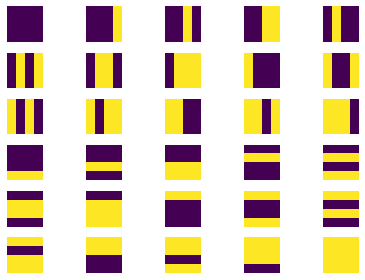

In [3]:
#################################### Input Data ################################
train_dataset = qaml.datasets.BAS(*SHAPE,transform=torch_transforms.ToTensor())
train_sampler = torch.utils.data.RandomSampler(train_dataset,replacement=True,
                                               num_samples=SAMPLES)
train_loader = torch.utils.data.DataLoader(train_dataset,sampler=train_sampler,
                                           batch_size=BATCH_SIZE)

# PLot all data
fig,axs = plt.subplots(6,5)
for ax,(img,label) in zip(axs.flat,train_dataset):
    ax.matshow(img.view(*SHAPE),vmin=0,vmax=1); ax.axis('off')
plt.tight_layout()


In [4]:
################################# Model Definition #############################
# Specify model with dimensions
rbm = qaml.nn.RBM(DATA_SIZE, HIDDEN_SIZE)

# Initialize biases
torch.nn.init.constant_(rbm.b,0.5)
torch.nn.init.zeros_(rbm.c)
torch.nn.init.uniform_(rbm.W,-0.5,0.5)

# Set up optimizer
optimizer = torch.optim.SGD(rbm.parameters(), lr=learning_rate,
                            weight_decay=weight_decay,momentum=momentum)

# Set up training mechanisms
gibbs_sampler = qaml.sampler.GibbsNetworkSampler(rbm)
CD = qaml.autograd.SampleBasedConstrastiveDivergence()


In [5]:
################################## Model Training ##############################
# Set the model to training mode
rbm.train()
err_log = []
b_log = [rbm.b.detach().clone().numpy()]
c_log = [rbm.c.detach().clone().numpy()]
W_log = [rbm.W.detach().clone().numpy().flatten()]
for t in range(EPOCHS):
    epoch_error = torch.Tensor([0.])
    for img_batch, labels_batch in train_loader:
        input_data = img_batch.flatten(1)

        # Positive Phase
        v0, prob_h0 = input_data, rbm(input_data)
        # Negative Phase
        vk, prob_hk = gibbs_sampler(v0.detach(), k=5)

        # Reconstruction error from Contrastive Divergence
        err = CD.apply((v0,prob_h0), (vk,prob_hk), *rbm.parameters())

        # Do not accumulate gradients
        optimizer.zero_grad()

        # Compute gradients
        err.backward()

        # Update parameters
        optimizer.step()

        #Accumulate error for this epoch
        epoch_error  += err

    # Error Log
    b_log.append(rbm.b.detach().clone().numpy())
    c_log.append(rbm.c.detach().clone().numpy())
    W_log.append(rbm.W.detach().clone().numpy().flatten())
    err_log.append(epoch_error.item())
    print(f"Epoch {t} Reconstruction Error = {epoch_error.item()}")
# Set the model to evaluation mode
# rbm.eval()


Epoch 0 Reconstruction Error = 5.898280620574951
Epoch 1 Reconstruction Error = 3.3727633953094482
Epoch 2 Reconstruction Error = 1.8042042255401611
Epoch 3 Reconstruction Error = 0.9179895520210266
Epoch 4 Reconstruction Error = 0.6821247339248657
Epoch 5 Reconstruction Error = 0.7648184895515442
Epoch 6 Reconstruction Error = 0.7691875696182251
Epoch 7 Reconstruction Error = 0.590104341506958
Epoch 8 Reconstruction Error = 0.6273618936538696
Epoch 9 Reconstruction Error = 0.6527242064476013
Epoch 10 Reconstruction Error = 0.5940932035446167
Epoch 11 Reconstruction Error = 0.6313077211380005
Epoch 12 Reconstruction Error = 0.45227086544036865
Epoch 13 Reconstruction Error = 0.5987052917480469
Epoch 14 Reconstruction Error = 0.711042046546936
Epoch 15 Reconstruction Error = 0.9774032831192017
Epoch 16 Reconstruction Error = 0.5998556613922119
Epoch 17 Reconstruction Error = 0.5992380380630493
Epoch 18 Reconstruction Error = 0.8048571348190308
Epoch 19 Reconstruction Error = 0.572412848

Epoch 163 Reconstruction Error = 0.6395983099937439
Epoch 164 Reconstruction Error = 0.392123281955719
Epoch 165 Reconstruction Error = 0.2772655785083771
Epoch 166 Reconstruction Error = 0.4854753911495209
Epoch 167 Reconstruction Error = 0.48178815841674805
Epoch 168 Reconstruction Error = 0.4120248556137085
Epoch 169 Reconstruction Error = 0.43570929765701294
Epoch 170 Reconstruction Error = 0.45927301049232483
Epoch 171 Reconstruction Error = 0.348360151052475
Epoch 172 Reconstruction Error = 0.4905834197998047
Epoch 173 Reconstruction Error = 0.3874063193798065
Epoch 174 Reconstruction Error = 0.40820950269699097
Epoch 175 Reconstruction Error = 0.3706263303756714
Epoch 176 Reconstruction Error = 0.3899255692958832
Epoch 177 Reconstruction Error = 0.4516669809818268
Epoch 178 Reconstruction Error = 0.431585431098938
Epoch 179 Reconstruction Error = 0.44000449776649475
Epoch 180 Reconstruction Error = 0.40425607562065125
Epoch 181 Reconstruction Error = 0.4212989807128906
Epoch 182

Epoch 323 Reconstruction Error = 0.1760818064212799
Epoch 324 Reconstruction Error = 0.20459386706352234
Epoch 325 Reconstruction Error = 0.22905904054641724
Epoch 326 Reconstruction Error = 0.18118757009506226
Epoch 327 Reconstruction Error = 0.20385849475860596
Epoch 328 Reconstruction Error = 0.27277687191963196
Epoch 329 Reconstruction Error = 0.19338083267211914
Epoch 330 Reconstruction Error = 0.202561616897583
Epoch 331 Reconstruction Error = 0.22038045525550842
Epoch 332 Reconstruction Error = 0.17081007361412048
Epoch 333 Reconstruction Error = 0.1955319046974182
Epoch 334 Reconstruction Error = 0.16280192136764526
Epoch 335 Reconstruction Error = 0.1564413607120514
Epoch 336 Reconstruction Error = 0.21636053919792175
Epoch 337 Reconstruction Error = 0.13041147589683533
Epoch 338 Reconstruction Error = 0.18312811851501465
Epoch 339 Reconstruction Error = 0.1545124650001526
Epoch 340 Reconstruction Error = 0.23088443279266357
Epoch 341 Reconstruction Error = 0.18925127387046814

Epoch 485 Reconstruction Error = 0.10257136821746826
Epoch 486 Reconstruction Error = 0.09838852286338806
Epoch 487 Reconstruction Error = 0.12241268157958984
Epoch 488 Reconstruction Error = 0.14999574422836304
Epoch 489 Reconstruction Error = 0.13709649443626404
Epoch 490 Reconstruction Error = 0.20215770602226257
Epoch 491 Reconstruction Error = 0.14687567949295044
Epoch 492 Reconstruction Error = 0.11110901832580566
Epoch 493 Reconstruction Error = 0.11285871267318726
Epoch 494 Reconstruction Error = 0.1385543942451477
Epoch 495 Reconstruction Error = 0.11084097623825073
Epoch 496 Reconstruction Error = 0.11006057262420654
Epoch 497 Reconstruction Error = 0.10333451628684998
Epoch 498 Reconstruction Error = 0.11546054482460022
Epoch 499 Reconstruction Error = 0.11282950639724731
Epoch 500 Reconstruction Error = 0.06652674078941345
Epoch 501 Reconstruction Error = 0.15203982591629028
Epoch 502 Reconstruction Error = 0.09598433971405029
Epoch 503 Reconstruction Error = 0.111629039049

Epoch 641 Reconstruction Error = 0.10385787487030029
Epoch 642 Reconstruction Error = 0.08050194382667542
Epoch 643 Reconstruction Error = 0.06365549564361572
Epoch 644 Reconstruction Error = 0.11042514443397522
Epoch 645 Reconstruction Error = 0.10118165612220764
Epoch 646 Reconstruction Error = 0.11693397164344788
Epoch 647 Reconstruction Error = 0.061319977045059204
Epoch 648 Reconstruction Error = 0.06550860404968262
Epoch 649 Reconstruction Error = 0.09107699990272522
Epoch 650 Reconstruction Error = 0.09964850544929504
Epoch 651 Reconstruction Error = 0.10577085614204407
Epoch 652 Reconstruction Error = 0.07996997237205505
Epoch 653 Reconstruction Error = 0.09755310416221619
Epoch 654 Reconstruction Error = 0.10414525866508484
Epoch 655 Reconstruction Error = 0.10398891568183899
Epoch 656 Reconstruction Error = 0.08980047702789307
Epoch 657 Reconstruction Error = 0.0770234763622284
Epoch 658 Reconstruction Error = 0.07925349473953247
Epoch 659 Reconstruction Error = 0.09389618039

Epoch 805 Reconstruction Error = 0.08539244532585144
Epoch 806 Reconstruction Error = 0.06736809015274048
Epoch 807 Reconstruction Error = 0.08264905214309692
Epoch 808 Reconstruction Error = 0.054866015911102295
Epoch 809 Reconstruction Error = 0.09183889627456665
Epoch 810 Reconstruction Error = 0.07354876399040222
Epoch 811 Reconstruction Error = 0.06816825270652771
Epoch 812 Reconstruction Error = 0.08610525727272034
Epoch 813 Reconstruction Error = 0.05801796913146973
Epoch 814 Reconstruction Error = 0.05353233218193054
Epoch 815 Reconstruction Error = 0.06483012437820435
Epoch 816 Reconstruction Error = 0.05360037088394165
Epoch 817 Reconstruction Error = 0.07053405046463013
Epoch 818 Reconstruction Error = 0.11280348896980286
Epoch 819 Reconstruction Error = 0.08520680665969849
Epoch 820 Reconstruction Error = 0.06791657209396362
Epoch 821 Reconstruction Error = 0.05881547927856445
Epoch 822 Reconstruction Error = 0.08629727363586426
Epoch 823 Reconstruction Error = 0.0758371353

Epoch 961 Reconstruction Error = 0.08387556672096252
Epoch 962 Reconstruction Error = 0.047287940979003906
Epoch 963 Reconstruction Error = 0.056101590394973755
Epoch 964 Reconstruction Error = 0.07425355911254883
Epoch 965 Reconstruction Error = 0.061687588691711426
Epoch 966 Reconstruction Error = 0.04894334077835083
Epoch 967 Reconstruction Error = 0.07065123319625854
Epoch 968 Reconstruction Error = 0.05737960338592529
Epoch 969 Reconstruction Error = 0.06372717022895813
Epoch 970 Reconstruction Error = 0.0584067702293396
Epoch 971 Reconstruction Error = 0.06567785143852234
Epoch 972 Reconstruction Error = 0.06858441233634949
Epoch 973 Reconstruction Error = 0.06440052390098572
Epoch 974 Reconstruction Error = 0.05154329538345337
Epoch 975 Reconstruction Error = 0.06776633858680725
Epoch 976 Reconstruction Error = 0.05319088697433472
Epoch 977 Reconstruction Error = 0.06949189305305481
Epoch 978 Reconstruction Error = 0.05958080291748047
Epoch 979 Reconstruction Error = 0.067104846

Epoch 1266 Reconstruction Error = 0.06261986494064331
Epoch 1267 Reconstruction Error = 0.05606690049171448
Epoch 1268 Reconstruction Error = 0.0446678102016449
Epoch 1269 Reconstruction Error = 0.05055829882621765
Epoch 1270 Reconstruction Error = 0.06459832191467285
Epoch 1271 Reconstruction Error = 0.05313494801521301
Epoch 1272 Reconstruction Error = 0.041247785091400146
Epoch 1273 Reconstruction Error = 0.07504698634147644
Epoch 1274 Reconstruction Error = 0.05485332012176514
Epoch 1275 Reconstruction Error = 0.05064663290977478
Epoch 1276 Reconstruction Error = 0.05260494351387024
Epoch 1277 Reconstruction Error = 0.04358720779418945
Epoch 1278 Reconstruction Error = 0.04826954007148743
Epoch 1279 Reconstruction Error = 0.04874598979949951
Epoch 1280 Reconstruction Error = 0.05595692992210388
Epoch 1281 Reconstruction Error = 0.03756868839263916
Epoch 1282 Reconstruction Error = 0.06415945291519165
Epoch 1283 Reconstruction Error = 0.057240188121795654
Epoch 1284 Reconstruction E

Epoch 1427 Reconstruction Error = 0.05562290549278259
Epoch 1428 Reconstruction Error = 0.06636452674865723
Epoch 1429 Reconstruction Error = 0.06425204873085022
Epoch 1430 Reconstruction Error = 0.0617235004901886
Epoch 1431 Reconstruction Error = 0.04461684823036194
Epoch 1432 Reconstruction Error = 0.05960848927497864
Epoch 1433 Reconstruction Error = 0.05515003204345703
Epoch 1434 Reconstruction Error = 0.05619439482688904
Epoch 1435 Reconstruction Error = 0.07228246331214905
Epoch 1436 Reconstruction Error = 0.044157475233078
Epoch 1437 Reconstruction Error = 0.062171101570129395
Epoch 1438 Reconstruction Error = 0.03485533595085144
Epoch 1439 Reconstruction Error = 0.03298124670982361
Epoch 1440 Reconstruction Error = 0.041317880153656006
Epoch 1441 Reconstruction Error = 0.05044206976890564
Epoch 1442 Reconstruction Error = 0.04915967583656311
Epoch 1443 Reconstruction Error = 0.05088263750076294
Epoch 1444 Reconstruction Error = 0.04983878135681152
Epoch 1445 Reconstruction Err

Epoch 1590 Reconstruction Error = 0.0483076274394989
Epoch 1591 Reconstruction Error = 0.037046074867248535
Epoch 1592 Reconstruction Error = 0.05282917618751526
Epoch 1593 Reconstruction Error = 0.05190795660018921
Epoch 1594 Reconstruction Error = 0.033858418464660645
Epoch 1595 Reconstruction Error = 0.04209476709365845
Epoch 1596 Reconstruction Error = 0.03788366913795471
Epoch 1597 Reconstruction Error = 0.04349350929260254
Epoch 1598 Reconstruction Error = 0.039724379777908325
Epoch 1599 Reconstruction Error = 0.045039594173431396
Epoch 1600 Reconstruction Error = 0.05232363939285278
Epoch 1601 Reconstruction Error = 0.0418875515460968
Epoch 1602 Reconstruction Error = 0.037792980670928955
Epoch 1603 Reconstruction Error = 0.0501713752746582
Epoch 1604 Reconstruction Error = 0.05312222242355347
Epoch 1605 Reconstruction Error = 0.05830162763595581
Epoch 1606 Reconstruction Error = 0.032438725233078
Epoch 1607 Reconstruction Error = 0.039966851472854614
Epoch 1608 Reconstruction E

Epoch 1747 Reconstruction Error = 0.04089009761810303
Epoch 1748 Reconstruction Error = 0.048224806785583496
Epoch 1749 Reconstruction Error = 0.036934733390808105
Epoch 1750 Reconstruction Error = 0.044603586196899414
Epoch 1751 Reconstruction Error = 0.03510293364524841
Epoch 1752 Reconstruction Error = 0.03561249375343323
Epoch 1753 Reconstruction Error = 0.030440479516983032
Epoch 1754 Reconstruction Error = 0.044420212507247925
Epoch 1755 Reconstruction Error = 0.04136309027671814
Epoch 1756 Reconstruction Error = 0.03612968325614929
Epoch 1757 Reconstruction Error = 0.04586401581764221
Epoch 1758 Reconstruction Error = 0.05368804931640625
Epoch 1759 Reconstruction Error = 0.037260740995407104
Epoch 1760 Reconstruction Error = 0.03948014974594116
Epoch 1761 Reconstruction Error = 0.032325953245162964
Epoch 1762 Reconstruction Error = 0.028925210237503052
Epoch 1763 Reconstruction Error = 0.03872472047805786
Epoch 1764 Reconstruction Error = 0.04376688599586487
Epoch 1765 Reconstru

qBAS : Precision = 0.85 Recall = 0.77 Score = 0.81


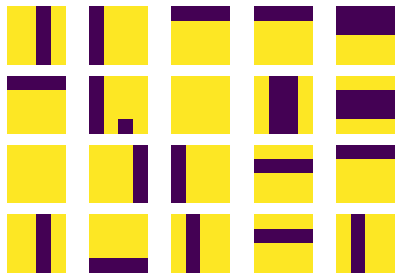

In [6]:
################################## Sampling ####################################
num_samples = 1000
prob_v,_ = gibbs_sampler(torch.rand(num_samples,DATA_SIZE),k=10)
img_samples = prob_v.view(num_samples,*SHAPE).bernoulli()
# PLot some samples
fig,axs = plt.subplots(4,5)
for ax,img in zip(axs.flat,img_samples):
    ax.matshow(img.view(*SHAPE),vmin=0,vmax=1); ax.axis('off')
plt.tight_layout()
# Get and print score
p,r,score = train_dataset.score(img_samples)
print(f"qBAS : Precision = {p:.02} Recall = {r:.02} Score = {score:.02}")


In [7]:
############################## RECONSTRUCTION ##################################
k = 10
count = 0
mask = torch_transforms.functional.erase(torch.ones(1,M,N),1,1,2,2,0).flatten()
for img, label in train_dataset:

    clamped = mask*img.flatten(1)
    prob_hk = rbm.forward(clamped + (1-mask)*0.5)
    prob_vk = rbm.generate(prob_hk).detach()
    for _ in range(k):
        masked = clamped + (1-mask)*prob_vk.data
        prob_hk.data = rbm.forward(masked).data
        prob_vk.data = rbm.generate(prob_hk).data
    recon = (clamped + (1-mask)*prob_vk).bernoulli().view(img.shape)

    if recon.equal(img):
        count+=1
print(f"Dataset Reconstruction: {count/len(train_dataset):.02}")


Dataset Reconstruction: 0.93


Text(0.5, 0, 'Epoch')

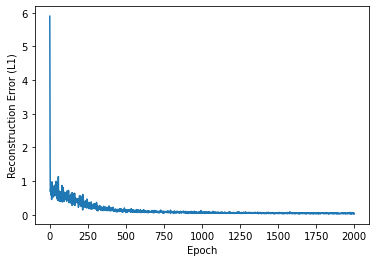

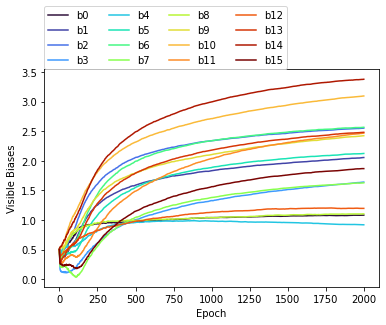

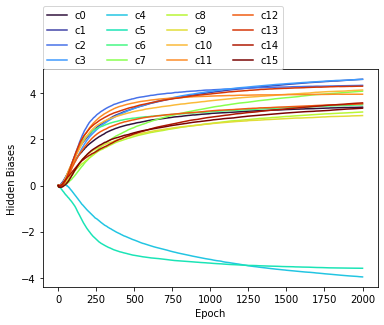

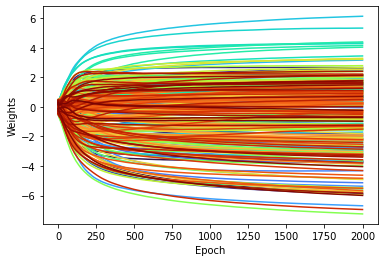

In [8]:
############################ MODEL VISUALIZATION ###############################

# L1 error graph
plt.plot(err_log)
plt.ylabel("Reconstruction Error (L1)")
plt.xlabel("Epoch")
plt.savefig("classical_err_log.pdf")

# Visible bias graph
fig, ax = plt.subplots()
ax.set_prop_cycle('color', list(plt.get_cmap('turbo',DATA_SIZE).colors))
lc_v = ax.plot(b_log)
plt.legend(lc_v,[f'b{i}' for i in range(DATA_SIZE)],ncol=4,loc=(0,1))
plt.ylabel("Visible Biases")
plt.xlabel("Epoch")
plt.savefig("classival_b_log.pdf")

# Hidden bias graph
fig, ax = plt.subplots()
ax.set_prop_cycle('color', list(plt.get_cmap('turbo',HIDDEN_SIZE).colors))
lc_h = plt.plot(c_log)
plt.legend(lc_h,[f'c{i}' for i in range(HIDDEN_SIZE)],ncol=4,loc=(0,1))
plt.ylabel("Hidden Biases")
plt.xlabel("Epoch")
plt.savefig("classical_c_log.pdf")

# Weights graph
fig, ax = plt.subplots()
ax.set_prop_cycle('color', list(plt.get_cmap('turbo',rbm.V*rbm.H).colors))
lc_w = plt.plot(W_log)
plt.ylabel("Weights")
plt.xlabel("Epoch")


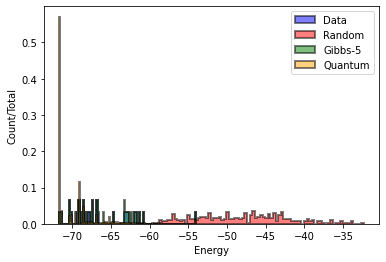

In [9]:
################################## ENERGY ######################################

data_energies = []
for img,label in train_dataset:
    data = img.flatten(1)
    data_energies.append(rbm.free_energy(data).item())

rand_energies = []
rand_data = torch.rand(len(train_dataset)*10,rbm.V)
for img in rand_data:
    rand_energies.append(rbm.free_energy(img.bernoulli()).item())

gibbs_energies = []
gibbs_sampler = qaml.sampler.GibbsNetworkSampler(rbm)
for img,label in train_dataset:
    data = img.flatten(1)
    prob_v,prob_h = gibbs_sampler(data,k=5)
    gibbs_energies.append(rbm.free_energy(prob_v.bernoulli()).item())

qa_energies = []
solver_name = "Advantage_system1.1"
qa_sampler = qaml.sampler.QASampler(rbm,solver=solver_name,beta=2.5)
qa_sampleset = qa_sampler(num_reads=1000,auto_scale=False)
for s_v,s_h in zip(*qa_sampleset):
    qa_energies.append(rbm.free_energy(s_v.detach()).item())

plot_data = [(data_energies,  'Data',    'blue'),
             (rand_energies,  'Random',  'red'),
             (gibbs_energies, 'Gibbs-5', 'green'),
             (qa_energies,    'Quantum', 'orange')]

hist_kwargs = {'ec':'k','lw':2.0,'alpha':0.5,'histtype':'stepfilled','bins':100}
weights = lambda data: [1./len(data) for _ in data]

for data,name,color in plot_data:
    plt.hist(data,weights=weights(data),label=name,color=color,**hist_kwargs)

plt.xlabel("Energy")
plt.ylabel("Count/Total")
plt.legend(loc='upper right')
plt.savefig("classical_energies.pdf")


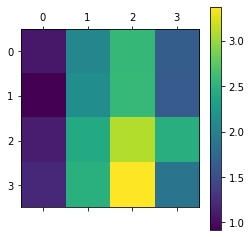

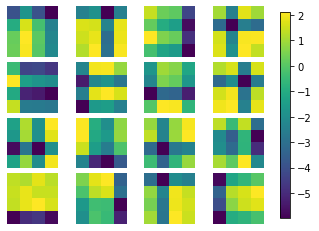

In [10]:
################################## VISUALIZE ###################################
plt.matshow(rbm.b.detach().view(*SHAPE), cmap='viridis')
plt.colorbar()
plt.savefig("classical_b.pdf")

fig,axs = plt.subplots(HIDDEN_SIZE//4,4)
for i,ax in enumerate(axs.flat):
    weight_matrix = rbm.W[i].detach().view(*SHAPE)
    ms = ax.matshow(weight_matrix, cmap='viridis')
    ax.axis('off')
fig.subplots_adjust(wspace=0.1, hspace=0.1)
cbar = fig.colorbar(ms, ax=axs.ravel().tolist(), shrink=0.95)
plt.savefig("classical_weights.pdf")